In [1]:
# 正则化 — 使用Gluon
# http://zh.gluon.ai/chapter_supervised-learning/reg-gluon.html

#高维线性回归数据集
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon
import mxnet as mx

num_train = 20
num_test = 100
num_inputs = 200

true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

X = nd.random.normal(shape=(num_train + num_test, num_inputs))
y = nd.dot(X, true_w) + true_b
y += .01 * nd.random.normal(shape=y.shape)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

/home/ly/anaconda3/envs/learning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# 定义训练和测试
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import numpy as np

batch_size = 1
dataset_train = gluon.data.ArrayDataset(X_train, y_train)
data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)

square_loss = gluon.loss.L2Loss()

def test(net, X, y):
    return square_loss(net(X), y).mean().asscalar()

def train(weight_decay):
    epochs = 10
    learning_rate = 0.005
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.collect_params().initialize(mx.init.Normal(sigma=1))

    # 注意到这里 'wd'
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate, 'wd': weight_decay})

    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(test(net, X_train, y_train))
        test_loss.append(test(net, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()

    return ('learned w[:10]:', net[0].weight.data()[:,:10],
            'learned b:', net[0].bias.data())

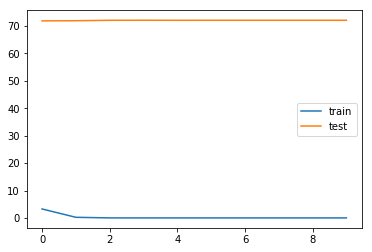

('learned w[:10]:', 
[[ 0.5558093   0.86420417 -0.45820528  1.5273323   0.7745043   0.0993899
   1.5138979  -0.11312011 -1.3944868  -1.2200668 ]]
<NDArray 1x10 @cpu(0)>, 'learned b:', 
[0.29741624]
<NDArray 1 @cpu(0)>)

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
<NDArray 10x1 @cpu(0)> 0.05


In [5]:
print(train(0))
print(true_w[:10], true_b)

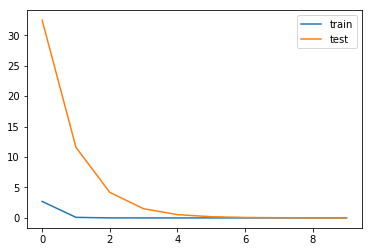

('learned w[:10]:', 
[[ 0.00114495  0.00651995 -0.00249216  0.00590799  0.0039797  -0.00107584
   0.00108405  0.00677961  0.00180512 -0.00501487]]
<NDArray 1x10 @cpu(0)>, 'learned b:', 
[0.0101903]
<NDArray 1 @cpu(0)>)

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
<NDArray 10x1 @cpu(0)> 0.05


In [6]:
print(train(5))
print(true_w[:10], true_b)